In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment 6 on logistic rgsn\\bank-full.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#checking whether there are any missing values are not

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#there are some null values in the given data set

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.shape

(45211, 17)

In [13]:
#detecting outliers

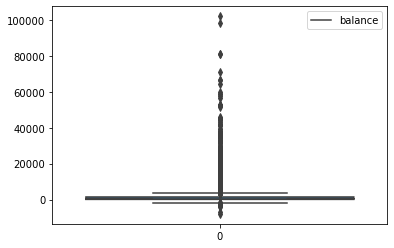

In [14]:
sns.boxplot(data=[df['balance']],notch=True)
plt.legend(['balance'])

In [16]:
Q1 = df.balance.quantile(0.25)
Q3 = df.balance.quantile(0.75)
Q1,Q3

(72.0, 1428.0)

In [17]:
IQR = Q3-Q1
IQR

1356.0

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1962.0, 3462.0)

In [19]:
#there are outliers

In [20]:
df[(df.balance<lower_limit)|(df.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35,services,married,tertiary,no,4655,no,no,cellular,9,nov,111,2,-1,0,unknown,no
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no
45185,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,yes
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes


In [21]:
df_no_outlier = df[(df.balance>lower_limit)&(df.balance<upper_limit)]
df_no_outlier

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


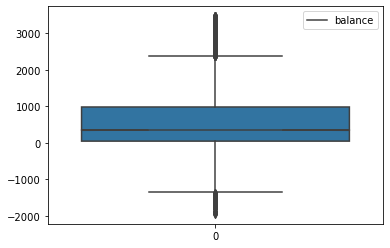

In [22]:
sns.boxplot(data=[df_no_outlier['balance']],notch=True)
plt.legend(['balance'])

In [23]:
#suspected there are more outliers to trying to remove

In [24]:
Q1 = df_no_outlier.balance.quantile(0.25)
Q3 = df_no_outlier.balance.quantile(0.75)
Q1,Q3

(46.0, 980.0)

In [25]:
IQR = Q3 - Q1
IQR

934.0

In [26]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1355.0, 2381.0)

In [27]:
df_no_outlier[(df_no_outlier.balance<lower_limit)|(df_no_outlier.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40,44,services,divorced,secondary,no,2586,yes,no,unknown,5,may,160,1,-1,0,unknown,no
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
244,49,management,married,tertiary,no,3237,yes,no,unknown,5,may,232,3,-1,0,unknown,no
257,30,technician,single,secondary,no,2573,yes,no,unknown,5,may,67,2,-1,0,unknown,no
323,32,technician,divorced,tertiary,no,2558,no,no,unknown,5,may,148,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45169,31,management,married,tertiary,no,2994,yes,no,cellular,10,nov,182,1,229,2,failure,no
45175,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
45180,66,retired,married,secondary,no,3409,no,no,cellular,15,nov,414,2,27,6,failure,no
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes


In [28]:
df_no_outlier_new = df_no_outlier[(df_no_outlier.balance>lower_limit)&(df_no_outlier.balance<upper_limit)]
df_no_outlier

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


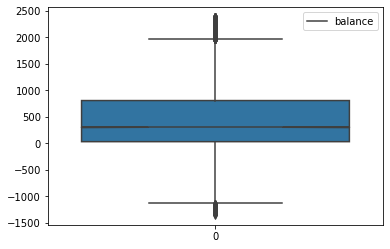

In [29]:
sns.boxplot(data=[df_no_outlier_new['balance']],notch=True)
plt.legend(['balance'])

In [30]:
# suspected there are outliers boxplot

In [31]:
Q1 = df_no_outlier_new.balance.quantile(0.25)
Q3 = df_no_outlier_new.balance.quantile(0.75)
Q1,Q3

(32.0, 808.0)

In [32]:
IQR=Q3-Q1
print(IQR)

776.0


In [33]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1132.0, 1972.0)

In [34]:
df_no_outlier_new[(df_no_outlier_new.balance<lower_limit)|(df_no_outlier_new.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
190,51,retired,married,secondary,no,2127,yes,no,unknown,5,may,172,1,-1,0,unknown,no
249,51,services,married,secondary,no,2248,yes,no,unknown,5,may,714,2,-1,0,unknown,no
427,54,blue-collar,married,primary,no,2102,yes,no,unknown,6,may,76,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45153,64,retired,married,tertiary,no,2059,no,yes,cellular,9,nov,326,1,95,1,other,no
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,379,2,92,3,failure,no


In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
df_no_outlier_new1 = df_no_outlier_new[(df_no_outlier_new.balance>lower_limit)&(df_no_outlier_new.balance<upper_limit)]
df_no_outlier_new1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


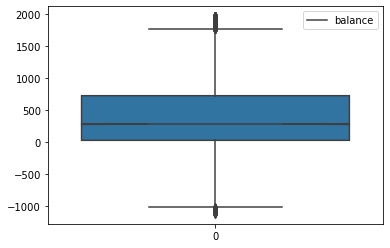

In [37]:
sns.boxplot(data=[df_no_outlier_new1['balance']],notch=True)
plt.legend(['balance'])

In [38]:
# i suspected there are outliers

In [39]:
Q1 = df_no_outlier_new1.balance.quantile(0.25)
Q3 = df_no_outlier_new1.balance.quantile(0.75)
Q1,Q3

(25.0, 725.0)

In [40]:
IQR=Q3-Q1
print(IQR)

700.0


In [41]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1025.0, 1775.0)

In [42]:
df_no_outlier_new1[(df_no_outlier_new1.balance<lower_limit)|(df_no_outlier_new1.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
74,43,technician,married,secondary,no,1937,yes,no,unknown,5,may,181,1,-1,0,unknown,no
156,51,blue-collar,married,unknown,no,1883,yes,no,unknown,5,may,57,1,-1,0,unknown,no
233,53,blue-collar,married,unknown,no,1827,no,no,unknown,5,may,121,1,-1,0,unknown,no
407,46,blue-collar,divorced,primary,no,1927,yes,no,unknown,6,may,241,3,-1,0,unknown,no
479,39,management,single,secondary,no,1877,yes,no,unknown,6,may,185,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45036,28,management,married,tertiary,no,1918,no,no,cellular,18,oct,333,1,616,1,failure,no
45052,49,blue-collar,married,secondary,no,1946,no,no,cellular,19,oct,192,1,95,1,success,yes
45066,29,student,single,secondary,no,1925,no,no,cellular,21,oct,150,3,149,5,success,yes
45109,78,management,married,unknown,no,1780,yes,no,cellular,25,oct,211,2,185,7,success,yes


In [43]:
df_1 = df_no_outlier_new1[(df_no_outlier.balance>lower_limit)&(df_no_outlier.balance<upper_limit)]
df_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


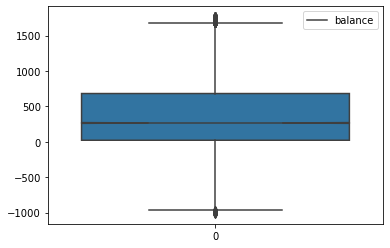

In [44]:
sns.boxplot(data=[df_1['balance']],notch=True)
plt.legend(['balance'])

In [45]:
# there are some outliers

In [46]:
Q1 = df_1.balance.quantile(0.25)
Q3 = df_1.balance.quantile(0.75)
Q1,Q3

(22.0, 682.0)

In [47]:
IQR=Q3-Q1
print(IQR)

660.0


In [48]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-968.0, 1672.0)

In [49]:
df_1[(df_1.balance<lower_limit)|(df_1.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
132,38,technician,single,secondary,no,1685,yes,no,unknown,5,may,185,1,-1,0,unknown,no
160,48,services,married,unknown,no,1705,yes,no,unknown,5,may,107,1,-1,0,unknown,no
431,42,management,married,tertiary,no,1680,yes,no,unknown,6,may,765,1,-1,0,unknown,no
514,50,management,divorced,secondary,no,1716,yes,no,unknown,6,may,82,1,-1,0,unknown,no
566,38,management,married,unknown,no,1759,yes,no,unknown,6,may,440,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44932,71,retired,married,secondary,no,1696,no,no,cellular,6,oct,486,1,-1,0,unknown,yes
45053,25,admin.,single,tertiary,no,1734,no,no,cellular,19,oct,366,1,-1,0,unknown,no
45094,47,admin.,single,secondary,no,1693,yes,no,cellular,22,oct,608,2,92,4,other,yes
45121,56,admin.,divorced,secondary,no,1693,no,no,cellular,26,oct,238,4,442,4,failure,yes


In [50]:
df_2 = df_1[(df_1.balance>lower_limit)&(df_1.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


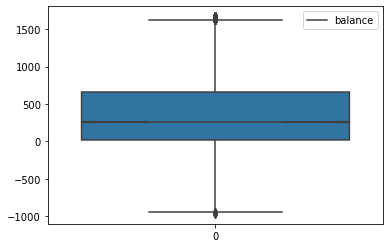

In [51]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

In [52]:
#still there are outliers

In [53]:
Q1 = df_2.balance.quantile(0.25)
Q3 = df_2.balance.quantile(0.75)
Q1,Q3

(20.0, 660.0)

In [54]:
IQR=Q3-Q1
print(IQR)

640.0


In [55]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-940.0, 1620.0)

In [56]:
df_2[(df_2.balance<lower_limit)|(df_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
385,58,services,married,secondary,no,1667,yes,yes,unknown,6,may,85,1,-1,0,unknown,no
409,46,blue-collar,married,secondary,no,1660,yes,no,unknown,6,may,259,1,-1,0,unknown,no
465,57,retired,single,secondary,no,1640,no,yes,unknown,6,may,204,4,-1,0,unknown,no
695,44,entrepreneur,married,tertiary,no,1631,yes,no,unknown,6,may,346,2,-1,0,unknown,no
1169,34,blue-collar,single,secondary,yes,-947,yes,no,unknown,8,may,211,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44700,34,admin.,married,tertiary,no,1636,yes,yes,cellular,6,sep,136,1,521,2,failure,no
44705,38,entrepreneur,married,tertiary,no,1649,no,yes,cellular,6,sep,218,2,432,3,success,no
44724,32,blue-collar,married,primary,no,1644,no,no,cellular,7,sep,492,3,102,5,other,yes
44922,54,blue-collar,single,secondary,no,1633,yes,no,unknown,4,oct,12,1,-1,0,unknown,no


In [57]:
df_2 = df_2[(df_2.balance>lower_limit)&(df_2.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


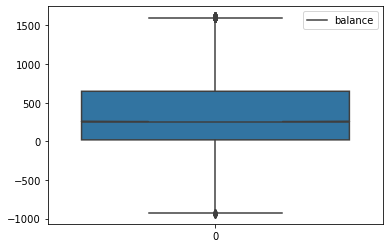

In [58]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

In [59]:
#suspected there more outliers

In [60]:
Q1 = df_2.balance.quantile(0.25)
Q3 = df_2.balance.quantile(0.75)
Q1,Q3

(19.5, 648.0)

In [61]:
IQR=Q3-Q1
print(IQR)

628.5


In [62]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-923.25, 1590.75)

In [63]:
df_2[(df_2.balance<lower_limit)|(df_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
571,56,blue-collar,married,secondary,no,1602,yes,no,unknown,6,may,427,1,-1,0,unknown,no
784,57,technician,married,unknown,no,1617,yes,no,unknown,7,may,96,2,-1,0,unknown,no
934,54,blue-collar,married,secondary,no,-932,yes,no,unknown,7,may,799,1,-1,0,unknown,no
1421,34,management,married,tertiary,no,1601,yes,no,unknown,8,may,650,2,-1,0,unknown,no
2596,32,admin.,divorced,secondary,no,1611,yes,yes,unknown,13,may,93,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44199,45,technician,single,tertiary,no,1591,no,no,cellular,15,jul,392,4,-1,0,unknown,no
44576,24,student,single,tertiary,no,1592,no,no,cellular,16,aug,98,3,111,5,other,no
44758,28,admin.,married,secondary,no,1595,no,no,unknown,9,sep,1,1,254,4,success,no
44759,28,admin.,married,secondary,no,1595,no,no,cellular,9,sep,268,1,254,4,success,yes


In [64]:
df_2 = df_2[(df_2.balance>lower_limit)&(df_2.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


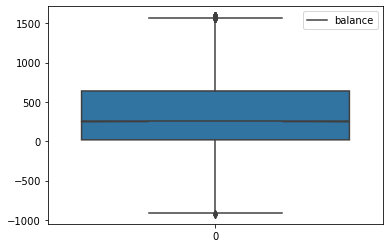

In [65]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

In [66]:
Q1 = df_2.balance.quantile(0.25)
Q3 = df_2.balance.quantile(0.75)
Q1,Q3

(19.0, 640.0)

In [67]:
IQR=Q3-Q1
print(IQR)

621.0


In [68]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-912.5, 1571.5)

In [69]:
df_2[(df_2.balance<lower_limit)|(df_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2716,41,management,divorced,tertiary,no,1576,yes,no,unknown,13,may,232,2,-1,0,unknown,no
4442,32,student,single,unknown,no,1583,yes,no,unknown,20,may,57,1,-1,0,unknown,no
4660,34,admin.,single,secondary,no,1581,yes,yes,unknown,20,may,52,11,-1,0,unknown,no
4985,31,admin.,single,tertiary,no,1583,yes,no,unknown,21,may,207,1,-1,0,unknown,no
5560,30,technician,single,secondary,no,1572,yes,yes,unknown,23,may,209,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44150,29,self-employed,single,tertiary,no,1579,no,no,cellular,13,jul,178,1,181,4,success,yes
44327,64,retired,married,secondary,no,1574,no,no,telephone,29,jul,301,3,-1,0,unknown,yes
44619,28,management,single,tertiary,no,1584,yes,no,cellular,1,sep,222,2,-1,0,unknown,yes
44690,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes


In [70]:
df_2 = df_2[(df_2.balance>lower_limit)&(df_2.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


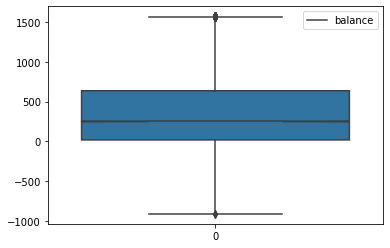

In [71]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

In [72]:
Q1 = df_2.balance.quantile(0.25)
Q3 = df_2.balance.quantile(0.75)
Q1,Q3

(19.0, 636.0)

In [73]:
IQR=Q3-Q1
print(IQR)

617.0


In [74]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-906.5, 1561.5)

In [75]:
df_2[(df_2.balance<lower_limit)|(df_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1126,46,technician,married,secondary,no,1571,yes,no,unknown,7,may,489,2,-1,0,unknown,no
2586,53,blue-collar,married,secondary,no,1570,yes,no,unknown,13,may,29,1,-1,0,unknown,no
3243,41,blue-collar,divorced,primary,no,1563,yes,no,unknown,15,may,112,1,-1,0,unknown,no
5182,49,blue-collar,married,secondary,no,1568,no,no,unknown,21,may,206,6,-1,0,unknown,no
5370,26,student,single,tertiary,no,1570,yes,no,unknown,23,may,81,1,-1,0,unknown,no
6759,57,management,married,primary,no,1566,no,no,unknown,28,may,105,4,-1,0,unknown,no
8759,29,management,single,tertiary,no,1566,yes,no,unknown,4,jun,233,1,-1,0,unknown,no
10225,57,management,married,tertiary,no,1571,no,no,unknown,11,jun,230,13,-1,0,unknown,no
10798,39,blue-collar,married,primary,no,1564,no,no,unknown,17,jun,57,1,-1,0,unknown,no
10895,48,blue-collar,married,secondary,no,1562,no,no,unknown,17,jun,50,2,-1,0,unknown,no


In [76]:
df_2 = df_2[(df_2.balance>lower_limit)&(df_2.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


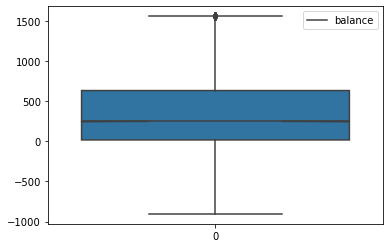

In [77]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

In [78]:
Q1 = df_2.balance.quantile(0.25)
Q3 = df_2.balance.quantile(0.75)
Q1, Q3

(18.0, 634.0)

In [79]:
IQR=Q3-Q1
print(IQR)

616.0


In [80]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-906.0, 1558.0)

In [81]:
df_2[(df_2.balance<lower_limit)|(df_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7574,43,blue-collar,married,secondary,no,1559,yes,no,unknown,30,may,123,1,-1,0,unknown,no
10201,37,admin.,single,secondary,no,1560,yes,no,unknown,11,jun,203,2,-1,0,unknown,no
10620,38,services,married,secondary,no,1559,no,no,unknown,16,jun,162,1,-1,0,unknown,no
13694,56,management,married,secondary,no,1560,yes,no,cellular,9,jul,89,1,-1,0,unknown,no
20891,56,technician,divorced,secondary,no,1561,no,no,cellular,13,aug,75,1,-1,0,unknown,no
21153,32,technician,married,tertiary,no,1559,yes,yes,cellular,14,aug,144,7,-1,0,unknown,no
23504,41,management,married,tertiary,no,1559,no,no,cellular,28,aug,74,7,-1,0,unknown,no
23809,37,technician,married,tertiary,no,1561,no,no,cellular,29,aug,88,7,-1,0,unknown,no
26607,53,unemployed,married,secondary,no,1561,no,no,cellular,20,nov,689,2,-1,0,unknown,no
26862,37,technician,divorced,secondary,no,1559,yes,no,cellular,20,nov,178,2,170,8,other,no


In [82]:
df_2 = df_2[(df_2.balance>lower_limit)&(df_2.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


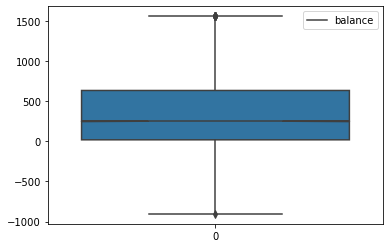

In [83]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

In [84]:
Q1 = df_2.balance.quantile(0.25)
Q3 = df_2.balance.quantile(0.75)
Q1, Q3

(18.0, 632.5)

In [85]:
IQR=Q3-Q1
print(IQR)

614.5


In [86]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-903.75, 1554.25)

In [87]:
df_2[(df_2.balance<lower_limit)|(df_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1053,50,blue-collar,married,secondary,no,1557,yes,no,unknown,7,may,263,6,-1,0,unknown,no
1943,35,admin.,divorced,tertiary,no,1555,yes,no,unknown,9,may,26,2,-1,0,unknown,no
2419,34,management,married,tertiary,no,1557,yes,yes,unknown,13,may,213,1,-1,0,unknown,no
6369,53,blue-collar,single,unknown,no,1555,yes,no,unknown,27,may,383,2,-1,0,unknown,no
6760,53,services,divorced,secondary,no,-905,yes,no,unknown,28,may,213,1,-1,0,unknown,no
11901,45,admin.,married,unknown,no,1557,no,no,unknown,20,jun,158,5,-1,0,unknown,no
13112,42,blue-collar,married,primary,no,1556,no,yes,cellular,8,jul,113,1,-1,0,unknown,no
17009,39,management,divorced,tertiary,no,1555,yes,no,cellular,25,jul,796,1,-1,0,unknown,no
17360,49,management,single,tertiary,no,1556,yes,no,cellular,28,jul,674,3,-1,0,unknown,no
22034,38,management,married,tertiary,no,1555,no,no,cellular,20,aug,66,5,-1,0,unknown,no


In [88]:
df_2 = df_2[(df_2.balance>lower_limit)&(df_2.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


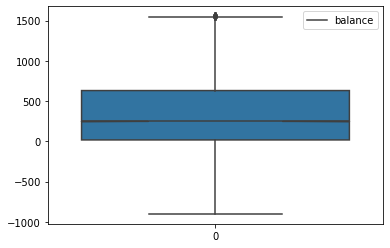

In [89]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

In [90]:
Q1 = df_2.balance.quantile(0.25)
Q3 = df_2.balance.quantile(0.75)
Q1, Q3

(18.0, 631.0)

In [91]:
IQR=Q3-Q1
print(IQR)

613.0


In [92]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-901.5, 1550.5)

In [93]:
df_2[(df_2.balance<lower_limit)|(df_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2314,36,blue-collar,married,secondary,no,1554,yes,no,unknown,12,may,325,4,-1,0,unknown,no
2603,39,blue-collar,married,secondary,no,1554,yes,no,unknown,13,may,378,1,-1,0,unknown,no
6415,33,services,married,secondary,no,1553,yes,no,unknown,27,may,492,8,-1,0,unknown,no
9203,53,retired,married,secondary,no,1554,no,no,unknown,5,jun,138,1,-1,0,unknown,no
11037,39,blue-collar,married,primary,no,1551,no,no,unknown,17,jun,264,16,-1,0,unknown,no
13331,39,self-employed,married,primary,no,1551,no,no,telephone,8,jul,389,7,-1,0,unknown,no
18124,55,entrepreneur,divorced,secondary,no,1553,no,no,cellular,30,jul,85,3,-1,0,unknown,no
18486,50,blue-collar,married,secondary,no,1553,yes,no,cellular,31,jul,53,2,-1,0,unknown,no
21922,34,technician,married,secondary,no,1553,no,no,cellular,20,aug,200,2,-1,0,unknown,no
25218,59,entrepreneur,married,tertiary,no,1553,no,yes,cellular,18,nov,79,2,-1,0,unknown,no


In [94]:
df_2 = df_2[(df_2.balance>lower_limit)&(df_2.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


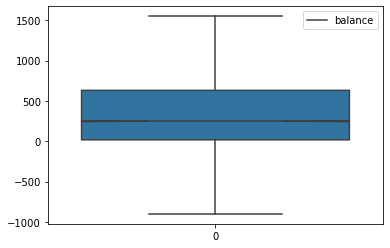

In [95]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

In [96]:
Q1 = df_2.balance.quantile(0.25)
Q3 = df_2.balance.quantile(0.75)
Q1, Q3

(18.0, 631.0)

In [97]:
IQR=Q3-Q1
print(IQR)

613.0


In [98]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-901.5, 1550.5)

In [99]:
df_2[(df_2.balance<lower_limit)|(df_2.balance>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [100]:
df_2 = df_2[(df_2.balance>lower_limit)&(df_2.balance<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


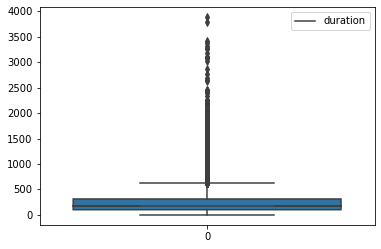

In [101]:
sns.boxplot(data=[df_2['duration']],notch=True)
plt.legend(['duration'])

In [102]:
Q1 = df_2.duration.quantile(0.25)
Q3 = df_2.duration.quantile(0.75)
Q1, Q3

(102.0, 313.0)

In [103]:
IQR=Q3-Q1
print(IQR)

211.0


In [104]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-214.5, 629.5)

In [105]:
df_2[(df_2.duration<lower_limit)|(df_2.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45085,25,technician,single,secondary,no,325,no,no,cellular,22,oct,716,3,-1,0,unknown,yes
45124,27,blue-collar,single,primary,no,232,yes,no,cellular,26,oct,701,2,-1,0,unknown,yes
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


In [106]:
df_2 = df_2[(df_2.duration>lower_limit)&(df_2.duration<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


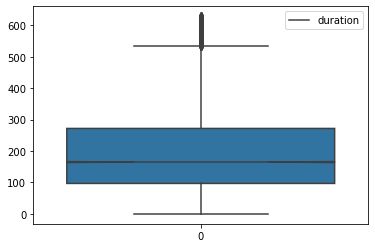

In [107]:
sns.boxplot(data=[df_2['duration']],notch=True)
plt.legend(['duration'])

In [108]:
Q1 = df_2.duration.quantile(0.25)
Q3 = df_2.duration.quantile(0.75)
Q1, Q3

(97.0, 272.0)

In [109]:
IQR=Q3-Q1
print(IQR)

175.0


In [110]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-165.5, 534.5)

In [111]:
df_2[(df_2.duration<lower_limit)|(df_2.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38,36,admin.,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,-1,0,unknown,no
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,unknown,no
92,60,admin.,married,secondary,no,290,yes,no,unknown,5,may,583,1,-1,0,unknown,no
139,46,blue-collar,married,secondary,no,265,yes,no,unknown,5,may,541,1,-1,0,unknown,no
149,54,blue-collar,married,primary,no,348,yes,no,unknown,5,may,579,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44904,48,management,single,tertiary,no,334,yes,no,cellular,28,sep,600,2,92,12,success,yes
45011,59,technician,married,secondary,no,1,no,no,cellular,14,oct,585,1,182,5,success,yes
45077,20,student,single,secondary,no,88,no,no,telephone,21,oct,621,1,181,4,other,no
45084,29,blue-collar,single,tertiary,no,455,no,no,cellular,22,oct,542,4,148,3,success,yes


In [112]:
df_2 = df_2[(df_2.duration>lower_limit)&(df_2.duration<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


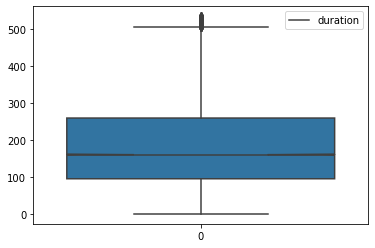

In [113]:
sns.boxplot(data=[df_2['duration']],notch=True)
plt.legend(['duration'])

In [114]:
Q1 = df_2.duration.quantile(0.25)
Q3 = df_2.duration.quantile(0.75)
Q1, Q3

(95.0, 259.0)

In [115]:
IQR=Q3-Q1
print(IQR)

164.0


In [116]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-151.0, 505.0)

In [117]:
df_2[(df_2.duration<lower_limit)|(df_2.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
66,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,-1,0,unknown,no
85,51,blue-collar,married,primary,no,173,yes,no,unknown,5,may,529,2,-1,0,unknown,no
108,59,retired,single,secondary,no,30,yes,no,unknown,5,may,514,1,-1,0,unknown,no
116,41,admin.,married,secondary,no,351,yes,no,unknown,5,may,518,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45042,64,retired,married,secondary,no,466,yes,no,cellular,18,oct,526,1,-1,0,unknown,yes
45131,47,management,married,tertiary,no,0,no,no,cellular,27,oct,508,1,-1,0,unknown,yes
45144,60,admin.,divorced,secondary,no,683,no,no,cellular,8,nov,507,1,-1,0,unknown,no
45160,35,technician,married,secondary,no,0,yes,no,cellular,9,nov,524,1,96,5,success,yes


In [118]:
df_2 = df_2[(df_2.duration>lower_limit)&(df_2.duration<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


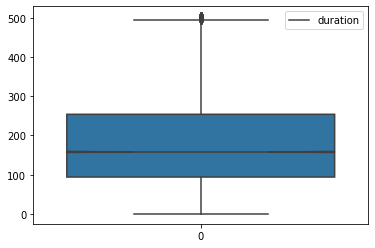

In [119]:
sns.boxplot(data=[df_2['duration']],notch=True)
plt.legend(['duration'])

In [120]:
Q1 = df_2.duration.quantile(0.25)
Q3 = df_2.duration.quantile(0.75)
Q1, Q3

(94.0, 254.0)

In [121]:
IQR=Q3-Q1
print(IQR)

160.0


In [122]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-146.0, 494.0)

In [123]:
df_2[(df_2.duration<lower_limit)|(df_2.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
345,53,services,married,unknown,no,18,no,no,unknown,5,may,503,2,-1,0,unknown,no
387,32,unemployed,married,secondary,no,10,yes,no,unknown,6,may,501,4,-1,0,unknown,no
420,49,management,single,tertiary,no,163,yes,no,unknown,6,may,496,3,-1,0,unknown,no
792,40,retired,married,primary,no,407,yes,no,unknown,7,may,502,1,-1,0,unknown,no
1332,34,blue-collar,single,secondary,no,177,yes,no,unknown,8,may,500,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43526,40,technician,married,tertiary,no,206,no,no,cellular,23,apr,499,6,185,4,success,yes
44312,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes
44436,29,management,single,tertiary,no,437,no,no,cellular,5,aug,504,1,92,1,success,yes
44494,40,blue-collar,married,secondary,no,1515,yes,no,cellular,10,aug,503,1,-1,0,unknown,yes


In [124]:
df_2 = df_2[(df_2.duration>lower_limit)&(df_2.duration<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


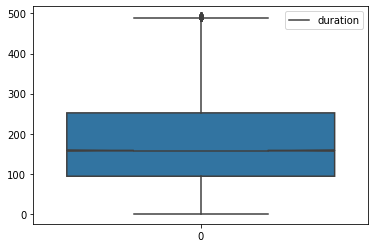

In [125]:
sns.boxplot(data=[df_2['duration']],notch=True)
plt.legend(['duration'])

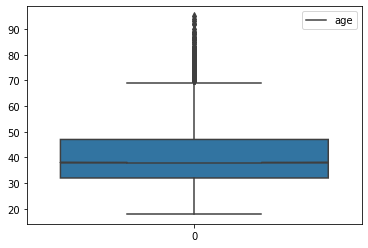

In [126]:
sns.boxplot(data=[df_2['age']],notch=True)
plt.legend(['age'])


In [127]:
Q1 = df_2.age.quantile(0.25)
Q3 = df_2.age.quantile(0.75)
Q1, Q3

(32.0, 47.0)

In [128]:
IQR=Q3-Q1
print(IQR)

15.0


In [129]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(9.5, 69.5)

In [130]:
df_2[(df_2.age<lower_limit)|(df_2.age>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
31052,71,retired,married,unknown,no,362,no,no,telephone,12,feb,139,2,-1,0,unknown,no
31057,72,retired,married,tertiary,no,0,no,no,cellular,13,feb,99,1,-1,0,unknown,yes
31069,90,retired,divorced,secondary,no,1,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
31089,82,retired,married,tertiary,no,278,no,no,cellular,16,feb,223,7,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45101,74,retired,married,secondary,no,935,no,no,cellular,25,oct,400,1,173,3,success,yes
45104,73,retired,married,primary,no,1388,no,no,telephone,25,oct,254,1,97,6,failure,no
45134,70,retired,married,secondary,no,0,no,no,cellular,27,oct,258,1,92,5,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


In [131]:
df_2 = df_2[(df_2.age>lower_limit)&(df_2.age<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


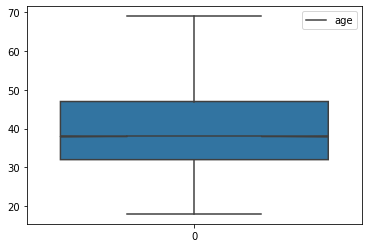

In [132]:
sns.boxplot(data=[df_2['age']],notch=True)
plt.legend(['age'])

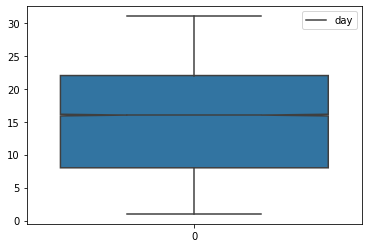

In [133]:
sns.boxplot(data=[df_2['day']],notch=True)
plt.legend(['day'])

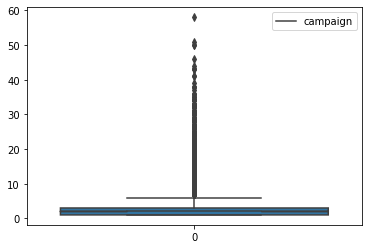

In [134]:
sns.boxplot(data=[df_2['campaign']],notch=True)
plt.legend(['campaign'])

In [135]:
Q1 = df_2.campaign.quantile(0.25)
Q3 = df_2.campaign.quantile(0.75)
Q1, Q3

(1.0, 3.0)

In [136]:
IQR=Q3-Q1
print(IQR)

2.0


In [137]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-2.0, 6.0)

In [138]:
df_2[(df_2.campaign<lower_limit)|(df_2.campaign>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
758,59,services,married,secondary,no,307,yes,yes,unknown,6,may,250,7,-1,0,unknown,no
780,30,admin.,married,secondary,no,4,no,no,unknown,7,may,172,8,-1,0,unknown,no
906,27,services,single,secondary,no,0,yes,no,unknown,7,may,388,7,-1,0,unknown,no
1103,52,technician,married,unknown,no,133,yes,no,unknown,7,may,253,8,-1,0,unknown,no
1386,37,admin.,married,primary,no,242,yes,no,unknown,8,may,161,8,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44378,24,student,single,secondary,no,867,no,no,cellular,2,aug,135,7,108,8,other,no
44583,24,student,single,secondary,no,431,no,no,cellular,19,aug,418,11,185,5,success,yes
44666,25,technician,single,secondary,no,1298,no,no,cellular,2,sep,206,7,94,2,other,no
44770,37,services,single,tertiary,no,1189,no,no,cellular,13,sep,323,9,199,4,other,yes


In [139]:
df_2 = df_2[(df_2.campaign>lower_limit)&(df_2.campaign<upper_limit)]
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes


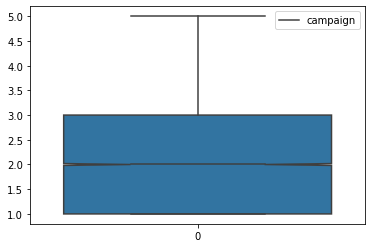

In [140]:
sns.boxplot(data=[df_2['campaign']],notch=True)
plt.legend(['campaign'])

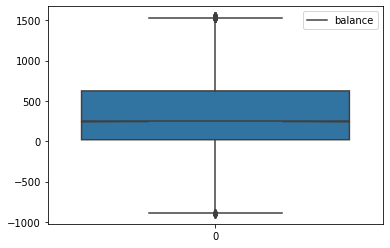

In [141]:
sns.boxplot(data=[df_2['balance']],notch=True)
plt.legend(['balance'])

### Transforming categorical into numerical data

In [142]:
dummys=pd.get_dummies(df_2.default)
dummys

,no,yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
45198,1,0
45201,1,0
45202,1,0
45203,1,0


In [143]:
merged = pd.concat([df_2,dummys],axis='columns')

In [144]:

merged

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,no,yes
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,1,0
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1,0
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1,0
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1,0


In [145]:
df_2 = merged.drop(['default','yes'],axis = 'columns')
df_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,1
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1


In [146]:
df_2.rename(columns={'no':'default'},inplace = True)

In [147]:
df_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,1
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1


In [148]:
dummy = pd.get_dummies(df_2.y)
dummys

,no,yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
45198,1,0
45201,1,0
45202,1,0
45203,1,0


In [149]:
merged = pd.concat([df_2,dummys],axis='columns')
merged

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default,no,yes
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,1,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,1,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,1,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no,1,1,0
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,yes,1,1,0
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes,1,1,0
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes,1,1,0


In [150]:
df_2 = merged.drop(['y','no'],axis = 'columns')
df_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,default,yes
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,1,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,1,0
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,1,0
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1,0
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1,0


In [151]:
df_2.rename(columns={'yes':'y'},inplace=True)
df_2

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,1,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,1,0
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,1,0
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1,0
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1,0


In [152]:
dummys = pd.get_dummies(df_2.loan)
dummys

,no,yes
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
...,...,...
45198,1,0
45201,1,0
45202,1,0
45203,1,0


In [153]:
merged = pd.concat([df_2,dummys],axis='columns')
merged

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,no,yes
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1,0,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0,1
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1,0,1,0
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,unknown,1,0,1,0
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,unknown,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1,0
45201,53,management,married,tertiary,583,no,no,cellular,17,nov,226,1,184,4,success,1,0,1,0
45202,34,admin.,single,secondary,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0
45203,23,student,single,tertiary,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0


In [154]:
df_2 = merged.drop(['loan','yes'],axis='columns')
df_2

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1
5,35,management,married,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1
45201,53,management,married,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1
45202,34,admin.,single,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1
45203,23,student,single,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1


In [155]:
df_2.rename(columns={'no':'loan'},inplace=True)
df_2

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1
5,35,management,married,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1
45201,53,management,married,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1
45202,34,admin.,single,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1
45203,23,student,single,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1


In [156]:
dummys=pd.get_dummies(df_2.marital)
dummys

,divorced,married,single
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0
...,...,...,...
45198,0,1,0
45201,0,1,0
45202,0,0,1
45203,0,0,1


In [157]:
merged = pd.concat([df_2,dummys],axis='columns')
merged

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,divorced,married,single
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1,0,0,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0,0,1,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1,0,1,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1,0,0,1
5,35,management,married,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1,0,1,0
45201,53,management,married,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1,0,1,0
45202,34,admin.,single,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0,0,1
45203,23,student,single,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0,0,1


In [158]:
df_2 = merged.drop(['marital','divorced'],axis='columns')
df_2

,age,job,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single
1,44,technician,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1,0,1
2,33,entrepreneur,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0,1,0
3,47,blue-collar,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1,1,0
4,33,unknown,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1,0,1
5,35,management,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1,1,0
45201,53,management,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1,1,0
45202,34,admin.,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0,1
45203,23,student,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0,1


In [159]:
dummys = pd.get_dummies(df_2.housing)
dummys

,no,yes
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
...,...,...
45198,1,0
45201,1,0
45202,1,0
45203,1,0


In [160]:
merged = pd.concat([df_2,dummys],axis='columns')
merged

,age,job,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,no,yes
1,44,technician,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1,0,1,0,1,0,1
2,33,entrepreneur,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1,0,0,1,0,0,1
3,47,blue-collar,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1,0,1,1,0,0,1
4,33,unknown,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1,0,1,0,1,1,0
5,35,management,tertiary,231,yes,unknown,5,may,139,1,-1,0,unknown,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,tertiary,1428,no,cellular,16,nov,333,2,-1,0,unknown,1,0,1,1,0,1,0
45201,53,management,tertiary,583,no,cellular,17,nov,226,1,184,4,success,1,0,1,1,0,1,0
45202,34,admin.,secondary,557,no,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0,1,1,0
45203,23,student,tertiary,113,no,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0,1,1,0


In [161]:
df_2 = merged.drop(['housing','no'],axis='columns')

In [162]:
df_2.rename(columns={'yes':'housing'},inplace=True)

In [163]:
df_2

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,44,technician,secondary,29,unknown,5,may,151,1,-1,0,unknown,1,0,1,0,1,1
2,33,entrepreneur,secondary,2,unknown,5,may,76,1,-1,0,unknown,1,0,0,1,0,1
3,47,blue-collar,unknown,1506,unknown,5,may,92,1,-1,0,unknown,1,0,1,1,0,1
4,33,unknown,unknown,1,unknown,5,may,198,1,-1,0,unknown,1,0,1,0,1,0
5,35,management,tertiary,231,unknown,5,may,139,1,-1,0,unknown,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,tertiary,1428,cellular,16,nov,333,2,-1,0,unknown,1,0,1,1,0,0
45201,53,management,tertiary,583,cellular,17,nov,226,1,184,4,success,1,0,1,1,0,0
45202,34,admin.,secondary,557,cellular,17,nov,224,1,-1,0,unknown,1,0,1,0,1,0
45203,23,student,tertiary,113,cellular,17,nov,266,1,-1,0,unknown,1,0,1,0,1,0


In [164]:
from sklearn import preprocessing

In [165]:
label_encoder = preprocessing.LabelEncoder()

In [166]:
df_2['month']=label_encoder.fit_transform(df_2['month'])

In [167]:
df_2['month'].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [168]:
df_2['job']=label_encoder.fit_transform(df_2['job'])

In [169]:
df_2['job'].unique()

array([ 9,  2,  1, 11,  4,  5,  0,  7,  6, 10,  3,  8])

In [170]:
df_2

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,44,9,secondary,29,unknown,5,8,151,1,-1,0,unknown,1,0,1,0,1,1
2,33,2,secondary,2,unknown,5,8,76,1,-1,0,unknown,1,0,0,1,0,1
3,47,1,unknown,1506,unknown,5,8,92,1,-1,0,unknown,1,0,1,1,0,1
4,33,11,unknown,1,unknown,5,8,198,1,-1,0,unknown,1,0,1,0,1,0
5,35,4,tertiary,231,unknown,5,8,139,1,-1,0,unknown,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,tertiary,1428,cellular,16,9,333,2,-1,0,unknown,1,0,1,1,0,0
45201,53,4,tertiary,583,cellular,17,9,226,1,184,4,success,1,0,1,1,0,0
45202,34,0,secondary,557,cellular,17,9,224,1,-1,0,unknown,1,0,1,0,1,0
45203,23,8,tertiary,113,cellular,17,9,266,1,-1,0,unknown,1,0,1,0,1,0


In [171]:
df_2['contact']=label_encoder.fit_transform(df_2['contact'])

In [172]:
df_2['contact'].unique()

array([2, 0, 1])

In [173]:
df_2

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,44,9,secondary,29,2,5,8,151,1,-1,0,unknown,1,0,1,0,1,1
2,33,2,secondary,2,2,5,8,76,1,-1,0,unknown,1,0,0,1,0,1
3,47,1,unknown,1506,2,5,8,92,1,-1,0,unknown,1,0,1,1,0,1
4,33,11,unknown,1,2,5,8,198,1,-1,0,unknown,1,0,1,0,1,0
5,35,4,tertiary,231,2,5,8,139,1,-1,0,unknown,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,tertiary,1428,0,16,9,333,2,-1,0,unknown,1,0,1,1,0,0
45201,53,4,tertiary,583,0,17,9,226,1,184,4,success,1,0,1,1,0,0
45202,34,0,secondary,557,0,17,9,224,1,-1,0,unknown,1,0,1,0,1,0
45203,23,8,tertiary,113,0,17,9,266,1,-1,0,unknown,1,0,1,0,1,0


In [174]:
df_2['education']=label_encoder.fit_transform(df_2['education'])
df_2['poutcome']=label_encoder.fit_transform(df_2['poutcome'])

In [175]:
print(df_2['education'].unique())
print(df_2['poutcome'].unique())

[1 3 2 0]
[3 0 1 2]


In [176]:
df_2.head(20)

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,44,9,1,29,2,5,8,151,1,-1,0,3,1,0,1,0,1,1
2,33,2,1,2,2,5,8,76,1,-1,0,3,1,0,0,1,0,1
3,47,1,3,1506,2,5,8,92,1,-1,0,3,1,0,1,1,0,1
4,33,11,3,1,2,5,8,198,1,-1,0,3,1,0,1,0,1,0
5,35,4,2,231,2,5,8,139,1,-1,0,3,1,0,1,1,0,1
6,28,4,2,447,2,5,8,217,1,-1,0,3,1,0,0,0,1,1
7,42,2,2,2,2,5,8,380,1,-1,0,3,0,1,1,0,0,1
8,58,5,0,121,2,5,8,50,1,-1,0,3,1,0,1,1,0,1
9,43,9,1,593,2,5,8,55,1,-1,0,3,1,0,1,0,1,1
10,41,0,1,270,2,5,8,222,1,-1,0,3,1,0,1,0,0,1


In [177]:
df_2.shape

(27102, 18)

### Checking data distribution

In [178]:
df_2.skew()

age           0.432297
job           0.265635
education     0.253179
balance       0.647651
contact       0.721506
day           0.173954
month        -0.531978
duration      0.713058
campaign      1.019990
pdays         2.567573
previous     55.279964
poutcome     -1.929536
default      -6.590475
y             6.590475
loan         -1.682431
married      -0.365505
single        0.916700
housing      -0.338773
dtype: float64

In [179]:
df_2.kurtosis()

age            -0.670497
job            -1.329917
education      -0.134777
balance         0.058385
contact        -1.409550
day            -1.072542
month          -0.936827
duration       -0.240565
campaign        0.136932
pdays           6.656431
previous     5890.002314
poutcome        1.947995
default        41.437423
y              41.437423
loan            0.830634
married        -1.866544
single         -1.159746
housing        -1.885372
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

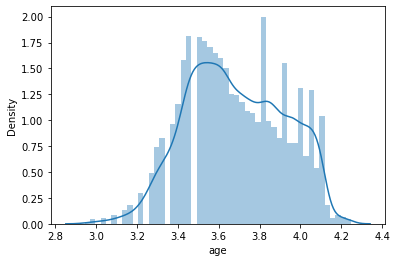

In [180]:
df_2['age']=np.log(df_2['age']+1)
sns.distplot(df_2['age'])

In [181]:
df_2.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,y,loan,married,single,housing
1,3.806662,9,1,29,2,5,8,151,1,-1,0,3,1,0,1,0,1,1
2,3.526361,2,1,2,2,5,8,76,1,-1,0,3,1,0,0,1,0,1
3,3.871201,1,3,1506,2,5,8,92,1,-1,0,3,1,0,1,1,0,1
4,3.526361,11,3,1,2,5,8,198,1,-1,0,3,1,0,1,0,1,0
5,3.583519,4,2,231,2,5,8,139,1,-1,0,3,1,0,1,1,0,1


## Feature selection

In [182]:
X = df_2.drop("y",axis=1)                   #Feature matrix
y = df_2['y']

In [183]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [184]:
X.head()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,loan,married,single,housing
1,3.806662,9,1,29,2,5,8,151,1,-1,0,3,1,1,0,1,1
2,3.526361,2,1,2,2,5,8,76,1,-1,0,3,1,0,1,0,1
3,3.871201,1,3,1506,2,5,8,92,1,-1,0,3,1,1,1,0,1
4,3.526361,11,3,1,2,5,8,198,1,-1,0,3,1,1,0,1,0
5,3.583519,4,2,231,2,5,8,139,1,-1,0,3,1,1,1,0,1


In [185]:
y.tail()

45198    0
45201    0
45202    0
45203    0
45205    0
Name: y, dtype: uint8

In [186]:
X.corr()

,age,job,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,default,loan,married,single,housing
age,1.000000,-0.033092,-0.107732,0.038780,0.044175,-0.009538,-0.051060,-0.046708,0.040578,-0.031511,-0.013437,0.017333,0.013201,-0.016840,0.305109,-0.458118,-0.114964
job,-0.033092,1.000000,0.168166,0.009773,-0.077292,0.024196,-0.093184,-0.001062,0.011854,-0.029979,-0.000438,0.015966,0.009072,0.030895,-0.093818,0.092455,-0.129073
education,-0.107732,0.168166,1.000000,0.053760,-0.115346,0.025184,-0.057782,0.001222,-0.016023,0.000868,0.019533,-0.022340,0.013720,0.046047,-0.124206,0.141528,-0.096481
balance,0.038780,0.009773,0.053760,1.000000,-0.035159,-0.005532,-0.027004,0.021143,-0.014639,0.040945,0.034838,-0.056540,0.143165,0.086914,0.021352,0.008385,-0.021797
contact,0.044175,-0.077292,-0.115346,-0.035159,1.000000,-0.026318,0.389007,-0.024483,-0.016639,-0.252677,-0.139950,0.285415,-0.022947,0.007467,0.037040,-0.052054,0.186883
day,-0.009538,0.024196,0.025184,-0.005532,-0.026318,1.000000,-0.014108,-0.037956,0.096638,-0.080683,-0.041629,0.069481,-0.008437,-0.006378,-0.001968,0.000466,-0.036483
month,-0.051060,-0.093184,-0.057782,-0.027004,0.389007,-0.014108,1.000000,0.001450,-0.111822,0.025122,0.011932,-0.016610,-0.021302,-0.021798,-0.019065,0.003889,0.285659
duration,-0.046708,-0.001062,0.001222,0.021143,-0.024483,-0.037956,0.001450,1.000000,-0.063996,0.014245,0.015243,-0.000441,-0.002611,0.005804,-0.018976,0.023445,0.008751
campaign,0.040578,0.011854,-0.016023,-0.014639,-0.016639,0.096638,-0.111822,-0.063996,1.000000,-0.067926,-0.009318,0.082691,-0.013030,0.003422,0.048452,-0.044957,-0.030997
pdays,-0.031511,-0.029979,0.000868,0.040945,-0.252677,-0.080683,0.025122,0.014245,-0.067926,1.000000,0.416125,-0.867540,0.035765,0.028171,-0.028548,0.034007,0.138537


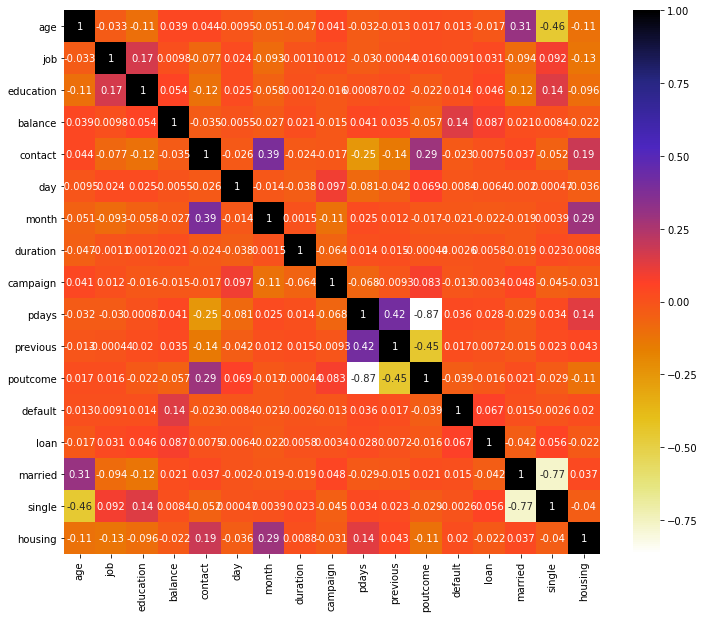

In [187]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = X.corr()                                          #Using Pearson Correlation
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =scaler.fit_transform(X[:])

In [189]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression()

In [190]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [191]:
y_pred_df = pd.DataFrame({'actual': y, 'predicted_prob': classifier.predict(X)})

In [192]:
y_pred_df

,actual,predicted_prob
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
45198,0,0
45201,0,0
45202,0,0
45203,0,0


In [193]:
# Confusion Matrix for the model accuarcy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[26518     0]
 [    0   584]]


In [196]:
((26453+584)/(26453+584+0+0))*100

100.0

Text(0, 0.5, 'True Positive Rate')

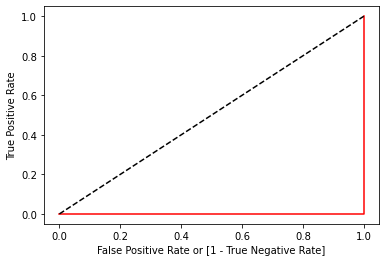

In [195]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (X)[:,0])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [197]:
auc

1.0

## Using searchgrid cv

In [198]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [199]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(classifier,param_grid = param_grid,cv = 3, verbose = True, n_jobs=-1)

In [200]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [201]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none')

In [202]:
print(f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 1.000
